In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
data=pd.read_csv("/kaggle/input/banknoteauthentication/data_banknote_authentication.csv")

data=np.array(data)

np.random.shuffle(data)

X=data[:,:2]
y=data[:,-1]
y[y==0]=-1

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [4]:
X_train=(X_train-np.mean(X_train,axis=0)/np.std(X_train,axis=0))
X_test=(X_test-np.mean(X_test,axis=0)/np.std(X_test,axis=0))

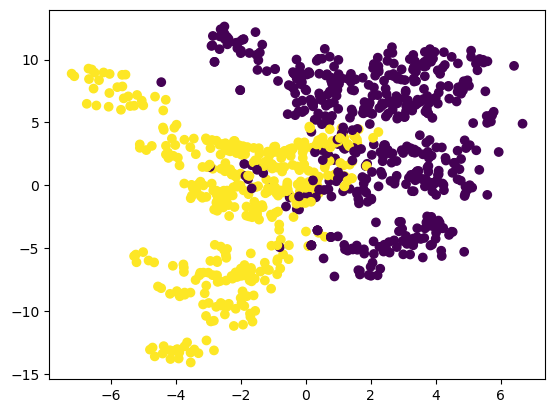

In [5]:
plt.scatter(X_train[:,0],X_train[:,1],c=y_train)
plt.show()

In [6]:
def Perceptron(X,y,epochs,eta):
    W=np.random.randn(2)
    b=np.random.randn()

    for j in range(epochs):
        Error=0
        for i in range(len(y)):

            yhat= np.dot(W,X[i].T) + b
            yhat= 1 if yhat>0 else -1

            W= W - eta * (yhat-y[i]) * X[i]
            b=b - eta * (yhat-y[i])

            Error+= 1 if (yhat-y[i])!=0  else 0

        if j%100==0:
            print(Error)
    return W,b,Error

In [7]:
W1,b1,Error1= Perceptron(X_train,y_train,1500,0.001)

166
170
177
174
167
165
168
176
167
174
170
184
160
158
170


In [8]:
def Decision_Boundary(X,y,W,b,Error):
    dum_x=np.linspace(-2,5,100)
    plt.scatter(X[:,0],X[:,1],c=y)
    plt.plot(dum_x,((-dum_x * W[0])-b)/W[1])
    plt.title("Error: "+ str(Error))
    plt.show()

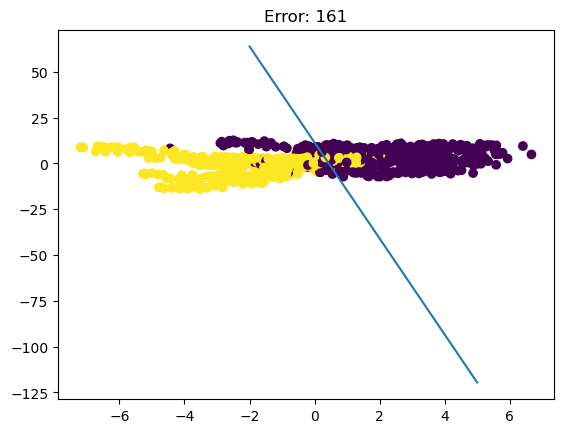

In [9]:
Decision_Boundary(X_train,y_train,W1,b1,Error1)

In [10]:
def Adaline(X,y,epochs,eta):
    W=np.random.randn(2)
    b=np.random.randn()

    for j in range(epochs):
        yhat= np.dot(W,X.T) + b

        Error= (1/(2*len(y))) * np.sum((yhat-y)**2)

        W= W - eta * np.mean((yhat-y) * X.T)
        b= b- eta * np.mean(yhat-y)

        if j%100==0:
            print(Error)
    return W,b,Error

In [11]:
W2,b2,Error2= Adaline(X_train,y_train,1500,0.001)

12.148425627655465
11.815721090278844
11.556821338690995
11.3421721472732
11.164151158970219
11.016507808707992
10.894058431973331
10.792503909966564
10.70827872879334
10.638425796560634
10.580492621783955
10.532445207990007
10.492596641409877
10.459547864522523
10.43213855604579


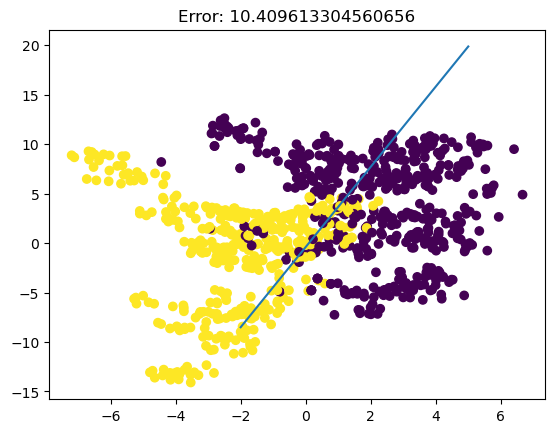

In [12]:
Decision_Boundary(X_train,y_train,W2,b2,Error2)

In [13]:
def Logistic_Regression(X,y,epochs,eta):
    W=np.random.randn(2)
    b=np.random.randn()

    for j in range(epochs):
        yhat= np.dot(W,X.T) + b

        Z=1/(1 + np.exp(-yhat))

        Error= np.sum((y * np.log(Z+1e-10) + (1-y) * np.log(1-Z+1e-10))) * -1/len(y)

        W= W - eta * np.mean((Z-y) * X.T)
        b= b- eta * np.mean(Z-y)

        if j%100==0:
            print(Error)
    return W,b,Error

In [14]:
W3,b3,Error3= Logistic_Regression(X_train,y_train,1500,0.01)

1.3622706865850387
-3.8797638838617012
-5.4815898495075945
-5.319630613139917
-4.947210955928364
-4.567635060728084
-4.252560433043628
-4.02293411859596
-3.8501873070140555
-3.7212701667739108
-3.6258158234631583
-3.5499986346198735
-3.4824296200807616
-3.4196164259602284
-3.3620145218780357


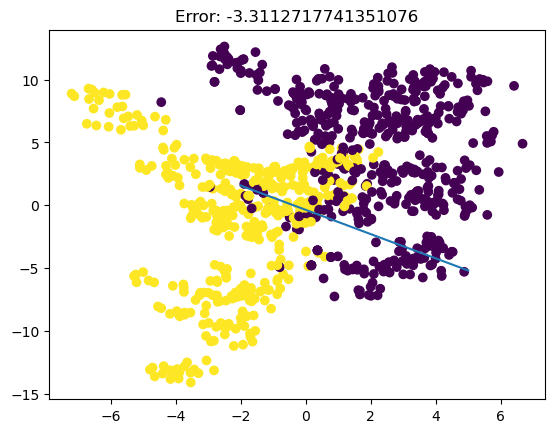

In [15]:
Decision_Boundary(X_train,y_train,W3,b3,Error3)

In [16]:
def test_model(W,b,X_test,y_test,arch):
    y_pred= np.dot(W,X_test.T) + b

    if arch=="Perceptron" or arch=="Adaline":
        y_pred[y_pred>0]=1
        y_pred[y_pred<0]=-1
    else:
        y_pred=1/(1 + np.exp(-y_pred))
        y_pred[y_pred<0.5]=-1
        y_pred[y_pred>0.5]=1

    print('\n',arch,(np.sum(y_pred==y_test)/len(y_test)) * 100)

In [17]:
test_model(W1,b1,X_test,y_test,"Perceptron")
test_model(W2,b2,X_test,y_test,"Adaline")
test_model(W3,b3,X_test,y_test,"Logistic_Regression")


 Perceptron 85.19417475728154

 Adaline 73.54368932038835

 Logistic_Regression 76.2135922330097
